In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#Read in data
df = pd.read_csv("ytdata_shortened.csv")
df.head(5)

,YouTube
0,Waoo
1,Awesome art work 👌👌😍😍
2,"Great artwork, lovely video. Thank you for sha..."
3,Nice drawing 👌
4,Beautiful drawing


In [3]:
# Some extra cleaning. Replacing html ampersand codes.
from w3lib.html import replace_entities
df["YouTube"] = df["YouTube"].astype(str)
df["YouTube"] = df["YouTube"].apply(replace_entities)

In [4]:
with open("positive_words.txt",'r') as file:
    positive_words = file.read().splitlines()

with open("negative_words.txt",'r') as file:
    negative_words = file.read().splitlines()

In [5]:
print(len(positive_words))
print(len(negative_words))

2006
4783


In [6]:
#Functions that count the occurences of positive/negative words in a text string
def count_positive(text):
    counter = 0
    for word in positive_words:
        counter += text.lower().split().count(word)
    return counter
def count_negative(text):
    counter = 0
    for word in negative_words:
        counter += text.lower().split().count(word)
    return counter

In [7]:
df["positive_words"] = df["YouTube"].apply(count_positive)

In [8]:
df["negative_words"] = df["YouTube"].apply(count_negative)

In [9]:
df.positive_words.describe()

count    11304.000000
mean         0.567764
std          1.089147
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         28.000000
Name: positive_words, dtype: float64

In [10]:
df.negative_words.describe()

count    11304.000000
mean         0.359253
std          0.991607
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: negative_words, dtype: float64

In [11]:
most_positive = df["positive_words"].argmax()

In [12]:
print(df.iloc[most_positive].YouTube)
print(df.iloc[most_positive].positive_words)

"Nice spider"? So, watching animals kill each other is "beautiful"? What does "natural" even mean? It is Scientifically Proven that the Earth is an Irregular Plane (Irregular refers to the Lands, which have elevation and deviation. Plane refers to the Standing Bodies of Water, which are always level), which is created because of Intent, Intelligent Design. If you want to watch a quick video to sum all this up, it's explained phenomenally by a Scientist (Realist) known as Del: https://youtu.be/TXWAMyLb-xs and also: https://youtu.be/pKYywPYJfWo

Here's why:

First of all, remember that Science DOES NOT belong to any institution. It DOES NOT belong to a particular group or person. It belongs to every single human being alive.
The ones searching for truths according to the type of the claim become Scientists. People searching for truths also become Realists (Truth Seekers). Science means exploring the inner and outer surroundings of ourselves.

There are three different types of Sciences:


In [13]:
most_negative = df["negative_words"].argmax()

In [14]:
print(df.iloc[most_negative].YouTube)
print(df.iloc[most_negative].negative_words)

"I do not believe anymore that UFOs are simply the spacecraft of some race of extraterrestrial visitors. This notion is too simplistic to explain their appearance, the frequency of their manifestations through recorded history, and the structure of the information exchanged with them during contact." - Dr. Jacques Valle 

"An impressive parallel can be made between UFO occupants and the popular conceptions of demons. UFOs can project images or fabricated scenes designed to change our belief systems... human belief... is being controlled and conditioned, man's concepts are being rearranged, and we may be headed toward  a massive change of human attitudes toward paranormal abilities and extraterrestrial life. - Dr. JV

"Human beings are under the control of a strange force that bends them in absurd ways, forcing them to play a role in a bizarre game of deception."
- Dr. Jacques Vallee, Messengers of Deception, p. 20

"We are dealing with a multidimensional paraphysical phenomenon which i

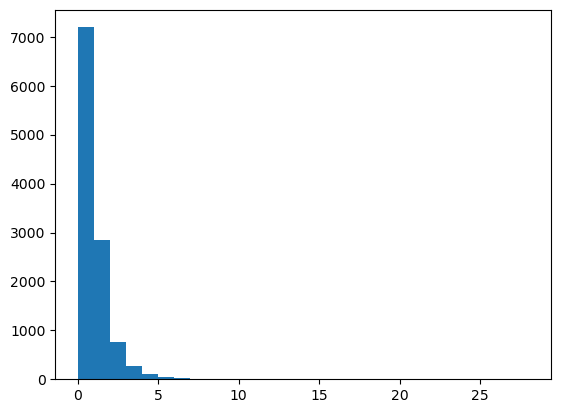

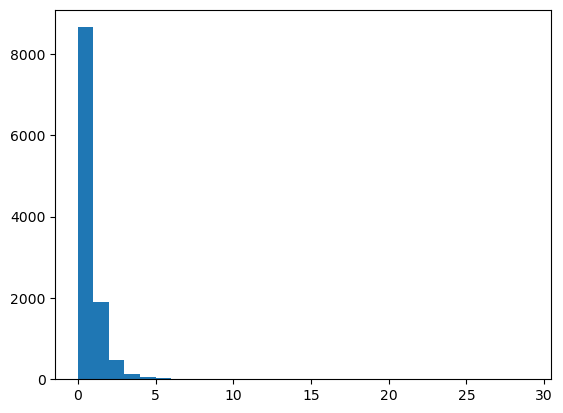

In [15]:
plt.hist(df.positive_words, bins = df.positive_words.max())
plt.show()
plt.hist(df.negative_words, bins = df.negative_words.max())
plt.show()

In [16]:
df["length"] = df["YouTube"].apply(len)
df["word_count"] = df["YouTube"].apply((lambda s:len(s.split())))

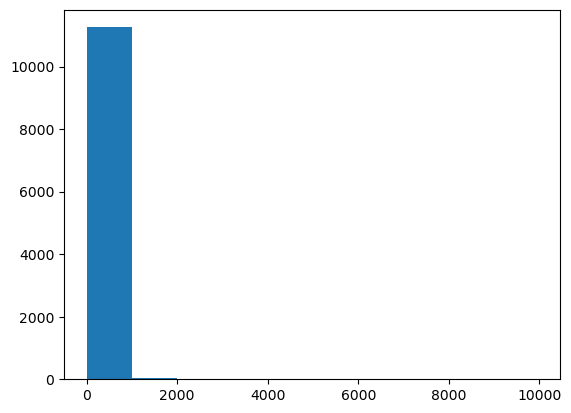

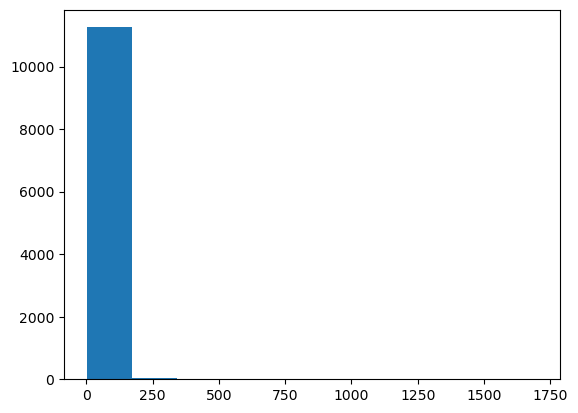

In [17]:
plt.hist(df["length"])
plt.show()
plt.hist(df["word_count"])
plt.show()

In [18]:
with open("male_words", 'r') as file:
    male_words = file.read().splitlines()

In [19]:
with open("female_words", 'r') as file:
    female_words = file.read().splitlines()

In [20]:
def count_male(text):
    counter = 0
    for word in male_words:
        counter += text.lower().split().count(word)
    return counter
def count_female(text):
    counter = 0
    for word in female_words:
        counter += text.lower().split().count(word)
    return counter

In [21]:
df["male_words"] = df["YouTube"].apply(count_male)

In [22]:
df["female_words"] = df["YouTube"].apply(count_female)

In [23]:
df["male_words"].describe()

count    11304.000000
mean         0.192321
std          0.766219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: male_words, dtype: float64

In [24]:
df["female_words"].describe()

count    11304.000000
mean         0.095807
std          0.599127
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: female_words, dtype: float64

In [25]:
df.iloc[df["female_words"].argmax()].YouTube

"Britny Fox – Girl School\n\nCome on girls!\n\n\nA school bell rings off the day,\nBrings in a stray a few girls at play.\nCut school pink slips are fine\nFor a good time there's boys on their mind.\n\nA bad girl smoking in school,\nBreaking the rules acting real cool.\nTalkin' 'bout all the rock boys,\nBack seat joys with some boy's toy.\n\nAt the girlschool, cause my baby broke all the rules.\nAt the girlschool, cause my baby broke all the rules.\n\nSaddle shoes uniforms blue,\nLove all the girls in the girlschool.\nTraffic jam in the hallway\nOoh I'm gonna stay this makes my day.\n\nWell here they come girls from the school,\nBreakin the rules hot on the loose.\nMy girl left right from school,\nCame over to my house, ooh...\n\nAt the girlschool, cause my baby broke all the rules.\nAt the girlschool, cause my baby broke all the rules.\n\nAt the girlschool, cause my baby broke all the rules.\nAt the girlschool, cause my baby broke all the rules.\n\nYou're stayin' after school\n\nAt th

In [26]:
df.iloc[df["male_words"].argmax()].YouTube

'Genesis 1:27-28-  So God created man in his own image, in the image of God created he him; male and female created he them.\n\n28 And God blessed them, and God said to them, Be fruitful, and multiply, and replenish the earth, and subdue it: and have dominion over the fish of the sea, and over the fowl of the air, and over every living thing that moves on the earth. AND Mark 10: 6-9 =  But from the beginning of the creation God made them male and female.\n\n\n7 For this cause shall a man leave his father and mother, and join to his wife;\n\n\n8 And they two shall be one flesh: so then they are no more two, but one flesh.\n\n\n9 What therefore God has joined together, let not man put asunder.\nbut what is outside of it, is not of God.'

In [27]:
from afinn import Afinn
afinn = Afinn(language='en')
df["afinn"] = df["YouTube"].apply(afinn.score)

In [28]:
df.sample(10)

,YouTube,positive_words,negative_words,length,word_count,male_words,female_words,afinn
7360,Haha child labour,0,0,17,3,0,0,3.0
9250,Same but I heard corona first,0,0,29,6,0,0,0.0
11265,She so beautiful ❤️❤️❤️,1,0,23,4,0,2,3.0
268,He's hot. And smart. UNF.,0,0,25,5,0,0,1.0
3414,That was amazing! Gave me chills and stuff.,0,0,43,8,0,0,4.0
800,One of the few horror movies I'll never watch....,2,0,157,32,0,0,3.0
3294,Alright miss fritz im boutta head out,0,1,37,7,0,0,-2.0
10027,Answer to all 3 . she took a shy tiny bite to...,1,0,115,25,0,4,0.0
6359,Stilwell's much better ever since the renovation.,1,0,49,7,0,0,2.0
393,"Little things, but there's an argument that it...",0,0,62,12,0,0,0.0


In [29]:
df.to_csv("ytdata_shortened_with_features.csv")